In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [3]:
ejemplo = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
print(ejemplo.head())
print(ejemplo.shape)

   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfilm|20th Century Fox                    US|US   
3                                       Pixar   

In [4]:
ejemplo_num = ejemplo.iloc[:,1:]
ejemplo_num.head()

,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,Allison Anders|Alexandre Rockwell|Robert Rodri...,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,Stephen Hopkins,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,George Lucas,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,Andrew Stanton,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,Robert Zemeckis,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


In [6]:
import pandas as pd
import numpy as np
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Filtrar solo las columnas numéricas
ejemplo_num = ejemplo.select_dtypes(include=[np.number])

# Revisar si hay valores NaN
if ejemplo_num.isnull().sum().sum() > 0:
    print("El dataset tiene valores NaN, se llenarán con la media de cada columna.")
    ejemplo_num = ejemplo_num.fillna(ejemplo_num.mean())

# Ahora sí ejecutar la prueba de Bartlett
chi_cuadrado, p_valor = calculate_bartlett_sphericity(ejemplo_num)

# Mostrar resultados
print(f'Valor Chi-cuadrado: {chi_cuadrado}')
print(f'Valor p: {p_valor}')

Valor Chi-cuadrado: 22861.174472130755
Valor p: 0.0


In [7]:
kmo,kmo_modelo = calculate_kmo(ejemplo_num)
print(f'Índice KMO: {kmo_modelo}')

Índice KMO: 0.7131226161072535


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Asegurar que solo se usan variables numéricas
ejemplo_num = ejemplo.select_dtypes(include=['number'])

# Escalar datos y aplicar PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(ejemplo_num)

# Extraer el modelo PCA
modelo_pca = pca_pipe.named_steps['pca']
print(f'Cantidad de Componentes Generados: {modelo_pca.n_components_}')

# Convertir los componentes en un DataFrame con nombres dinámicos
pca_resultado = pd.DataFrame(
    data=modelo_pca.components_,
    columns=ejemplo_num.columns,
    index=[f'PC{i+1}' for i in range(modelo_pca.n_components_)]
)

print("Resultado del PCA:")
print(pca_resultado.head())


Cantidad de Componentes Generados: 11
Resultado del PCA:
           id    budget   revenue   runtime  popularity   voteAvg  voteCount  \
PC1 -0.225102  0.501921  0.519759  0.285925    0.119149  0.172720   0.508017   
PC2  0.538927  0.102307  0.197044 -0.298472    0.557324  0.017949   0.112183   
PC3  0.327944 -0.132510 -0.092215  0.382328    0.240977  0.394636  -0.006707   
PC4 -0.034531 -0.228901 -0.118449  0.183264   -0.020290  0.717354   0.017973   
PC5  0.085539 -0.043718 -0.161717 -0.067952    0.367096  0.079233  -0.175792   

     genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  
PC1      0.160785            0.115109                  -0.041302     -0.050841  
PC2     -0.142039           -0.277156                  -0.020352      0.387630  
PC3     -0.327441            0.363503                   0.434436     -0.279779  
PC4      0.067058           -0.379278                  -0.484050      0.028472  
PC5      0.741038            0.467387                  -0

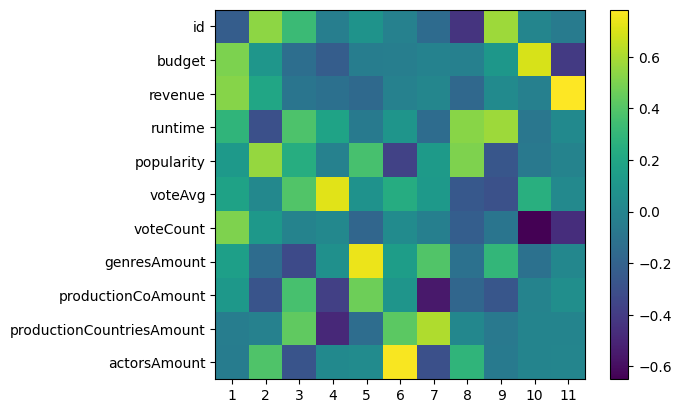

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(ejemplo_num.columns)), ejemplo_num.columns)
plt.xticks(range(len(ejemplo_num.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

In [13]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.25862531 0.10883742 0.1023966  0.09441796 0.08942156 0.08833715
 0.08388519 0.06992045 0.05858046 0.02891549 0.01666242]


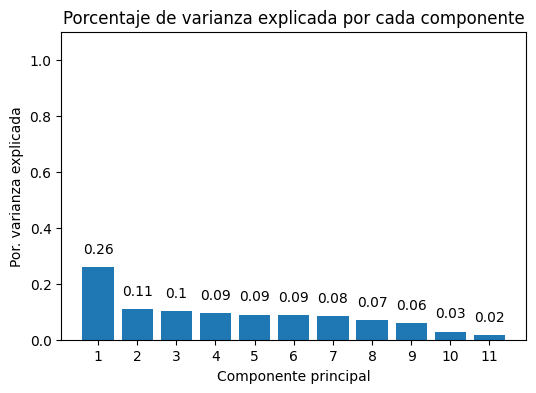

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(ejemplo_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.25862531 0.36746273 0.46985933 0.56427729 0.65369884 0.74203599
 0.82592118 0.89584163 0.95442209 0.98333758 1.        ]


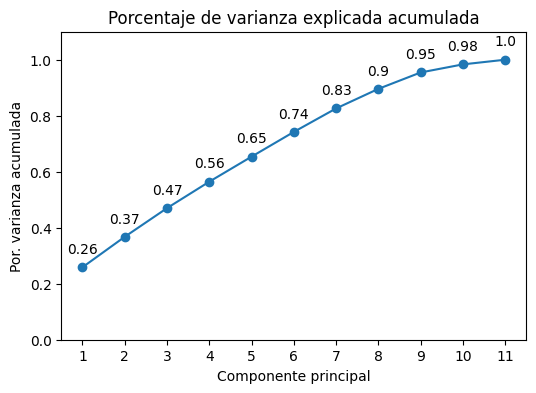

In [15]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(ejemplo_num.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(ejemplo_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [16]:
# Mostrar las cargas de los primeros 4 componentes
cargas = modelo_pca.components_[:4]

# Imprimir las cargas para interpretación
for i, carga in enumerate(cargas):
    print(f'Componente {i+1}:')
    for j, variable in enumerate(ejemplo_num.columns):
        print(f'  {variable}: {carga[j]:.3f}')
    print('---')

Componente 1:
  id: -0.225
  budget: 0.502
  revenue: 0.520
  runtime: 0.286
  popularity: 0.119
  voteAvg: 0.173
  voteCount: 0.508
  genresAmount: 0.161
  productionCoAmount: 0.115
  productionCountriesAmount: -0.041
  actorsAmount: -0.051
---
Componente 2:
  id: 0.539
  budget: 0.102
  revenue: 0.197
  runtime: -0.298
  popularity: 0.557
  voteAvg: 0.018
  voteCount: 0.112
  genresAmount: -0.142
  productionCoAmount: -0.277
  productionCountriesAmount: -0.020
  actorsAmount: 0.388
---
Componente 3:
  id: 0.328
  budget: -0.133
  revenue: -0.092
  runtime: 0.382
  popularity: 0.241
  voteAvg: 0.395
  voteCount: -0.007
  genresAmount: -0.327
  productionCoAmount: 0.364
  productionCountriesAmount: 0.434
  actorsAmount: -0.280
---
Componente 4:
  id: -0.035
  budget: -0.229
  revenue: -0.118
  runtime: 0.183
  popularity: -0.020
  voteAvg: 0.717
  voteCount: 0.018
  genresAmount: 0.067
  productionCoAmount: -0.379
  productionCountriesAmount: -0.484
  actorsAmount: 0.028
---


In [17]:
# Transformar los datos al espacio de 4 componentes
X_reducido = modelo_pca.transform(ejemplo_num)

# X_reducido ahora tiene solo 4 columnas (en lugar de las 7 originales)
print(X_reducido)

[[ 4.22156611e+06  1.24834203e+06 -9.22604441e+05 ...  5.85775595e+05
   2.67718430e+06  1.70478633e+06]
 [ 1.68487661e+07  4.53996343e+06 -3.90187031e+06 ...  2.70495703e+06
   1.43313378e+07  9.64291647e+05]
 [ 4.08549663e+08  1.53915189e+08 -7.29606553e+07 ...  2.93620421e+07
  -1.27680555e+07  6.02135241e+08]
 ...
 [-2.07432526e+05  4.97184937e+05  3.02558583e+05 ...  5.26581286e+05
  -8.13914425e+02 -4.99152845e+04]
 [-2.07560678e+05  4.96966012e+05  3.02444575e+05 ...  5.26785542e+05
  -7.52181522e+02 -4.99052500e+04]
 [ 5.19667279e+04  5.73129380e+05  2.45378394e+05 ...  5.63407744e+05
   1.69801562e+05  4.56262603e+04]]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
